# 📝 Análisis de Comentarios del New York Times

Este proyecto se enfoca exclusivamente en los **comentarios** de los artículos del New York Times, con el objetivo de llevar a cabo un análisis de sentimientos sobre los mismos.

## 🎯 Objetivo

El objetivo principal es procesar los comentarios realizados por los usuarios, aplicar técnicas de procesamiento de lenguaje natural (NLP), y etiquetarlos con un valor de **sentimiento** (por ejemplo: positivo, negativo o neutral). Una vez enriquecido el dataset con estas etiquetas, se entrenará una red neuronal para que sea capaz de **clasificar automáticamente** nuevos comentarios en base a su contenido textual.

## 🧩 Fases del proyecto

1. **Carga y consolidación de datos:**  
   Se trabajará únicamente con los archivos de comentarios, descartando los artículos.

2. **Preprocesamiento del texto:**  
   Se limpiará y normalizará el texto de cada comentario mediante técnicas como:
   - Tokenización
   - Conversión a minúsculas
   - Eliminación de signos de puntuación
   - Lematización
   - Remoción de stopwords

3. **Análisis de sentimientos:**  
   A cada comentario se le asignará una etiqueta de sentimiento utilizando una herramienta de análisis semántico.

4. **Entrenamiento de modelo:**  
   Con el dataset etiquetado, se entrenará una red neuronal que aprenderá a clasificar nuevos comentarios en función de su sentimiento.

5. **Evaluación y visualización:**  
   Finalmente se visualizarán las proporciones de sentimientos y se evaluará el desempeño del modelo.

Este flujo de trabajo permitirá construir una herramienta capaz de **entender el tono emocional** de los comentarios realizados en la plataforma del New York Times.

## 📚 Descripción del Dataset Original

Este proyecto se basa en el **New York Times Comments Dataset**, disponible en Kaggle, que contiene comentarios realizados por usuarios en artículos del periódico.

El dataset completo incluye dos componentes principales:

- **Comentarios**: Más de **2 millones de comentarios**, con **34 columnas** que contienen información detallada como:
  - Texto del comentario
  - Autor (userID, userDisplayName)
  - Fecha y hora de publicación
  - Sección y tipo de artículo comentado
  - Cantidad de recomendaciones de otros usuarios
  - Indicadores de selección por editores, respuestas y abusos

- **Artículos**: Aproximadamente **9 000 artículos**, cada uno con **16 columnas** de metadatos como:
  - Título del artículo
  - Sección y subsección
  - Fecha de publicación
  - URL del artículo
  - ID relacionado con los comentarios

🔗 **Descarga directa del dataset en Kaggle**:  
[NYT Comments Dataset](https://www.kaggle.com/datasets/aashita/nyt-comments)

> ⚠️ Para este proyecto, **solo se han utilizado los comentarios** con el objetivo de realizar un análisis de sentimientos, descartando los metadatos de los artículos.

## 🧰 Librerías necesarias

A continuación se listan las librerías utilizadas en este proyecto, junto con su propósito principal:

- **pandas**: Manipulación y análisis de datos estructurados (DataFrames).
- **numpy**: Operaciones matemáticas y estructuras de datos numéricas.
- **matplotlib.pyplot**: Visualización de datos en gráficos.
- **wordcloud**: Generación de nubes de palabras a partir de texto.
- **nltk**: Tokenización, eliminación de stopwords y lematización básica.
- **spacy**: Procesamiento de lenguaje natural y lematización avanzada.
- **string**: Manejo de caracteres y signos de puntuación.
- **textblob**: Análisis de sentimientos basado en reglas.
- **sklearn.feature_extraction.text**: Vectorización de texto (Bag of Words, TF-IDF).
- **tensorflow / keras**: Construcción y entrenamiento de redes neuronales profundas para clasificación.

In [15]:
# Descargar y descomprimir el dataset de Kaggle
import os
import kagglehub

# Análisis y manipulación de datos
import glob
import pandas as pd
import numpy as np

# NLP y vectorización
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import spacy

# Descargar recursos de NLTK
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('vader_lexicon')

# Preprocesamiento del Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Deep Learning con TensorFlow y Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

# Visualización
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 🔍 EDA: Analisis Inicial del Dataset

### 🗃️ Carga de Datos

El primer paso será cargar los datos desde Kaggle al notebook y determinar el path al archivo. Este dataset está compuesto por 18 archivos, los cuales poseen artículo y comentarios del diario New York Times en diferentes meses de los años 2017 y 2018.

Los artículos están conglomerados en 9 archivos CSV. Cada archivo posee un link a cada artículo, con su autor, un resumen y otros datos de interés.

| Archivo               | Año / Mes |
| --------------------- | --------- |
| ArticlesJan2017.csv   | Ene 2017  |
| ArticlesFeb2017.csv   | Feb 2017  |
| ArticlesMarch2017.csv | Mar 2017  |
| ArticlesApril2017.csv | Abr 2017  |
| ArticlesMay2017.csv   | May 2017  |
| ArticlesJan2018.csv   | Ene 2018  |
| ArticlesFeb2018.csv   | Feb 2018  |
| ArticlesMarch2018.csv | Mar 2018  |
| ArticlesApril2018.csv | Abr 2018  |

En el caso de los comentarios, los mismos están también han sido agrupados por mes, pero además de incluir los datos correspondientes a cada comentario (autor, cuerpo del comentario, título, resumen) también poseen información respecto a sobre cuál articulo fueron originalmente posteados.

| Archivo               | Año / Mes |
| --------------------- | --------- |
| CommentsJan2017.csv   | Ene 2017  |
| CommentsFeb2017.csv   | Feb 2017  |
| CommentsMarch2017.csv | Mar 2017  |
| CommentsApril2017.csv | Abr 2017  |
| CommentsMay2017.csv   | May 2017  |
| CommentsJan2018.csv   | Ene 2018  |
| CommentsFeb2018.csv   | Feb 2018  |
| CommentsMarch2018.csv | Mar 2018  |
| CommentsApril2018.csv | Abr 2018  |

In [2]:
# Descargar la última versión del dataset
path = kagglehub.dataset_download("aashita/nyt-comments")

print("Archivos descargados en:", path)

Archivos descargados en: C:\Users\George\.cache\kagglehub\datasets\aashita\nyt-comments\versions\13


En este notebook solo nos interesan los comentarios, no los artículos, por lo que procederemos a extraer los mismos desde el dataset y determinar cuales son los atributos presentes en cada archivos CSV. El objetivo es determinar aquellos atributos que necesitamos para poder crear una red neuronal capaz de determinar el sentimiento de un comentario.

In [3]:
# Buscar solo archivos de comentarios
comment_files = sorted([f for f in glob.glob(os.path.join(path, "*.csv")) if "Comments" in os.path.basename(f)])

# Lista para guardar los DataFrames
comment_dfs = []

# Cargar y guardar información de columnas
for file in comment_files:
    try:
        df = pd.read_csv(file, low_memory=False)
        comment_dfs.append(df)
        print(f"{os.path.basename(file)} → {list(df.columns)}")
    except Exception as e:
        print(f"Error al leer {file}: {e}")

CommentsApril2017.csv → ['approveDate', 'commentBody', 'commentID', 'commentSequence', 'commentTitle', 'commentType', 'createDate', 'depth', 'editorsSelection', 'parentID', 'parentUserDisplayName', 'permID', 'picURL', 'recommendations', 'recommendedFlag', 'replyCount', 'reportAbuseFlag', 'sharing', 'status', 'timespeople', 'trusted', 'updateDate', 'userDisplayName', 'userID', 'userLocation', 'userTitle', 'userURL', 'inReplyTo', 'articleID', 'sectionName', 'newDesk', 'articleWordCount', 'printPage', 'typeOfMaterial']
CommentsApril2018.csv → ['approveDate', 'articleID', 'articleWordCount', 'commentBody', 'commentID', 'commentSequence', 'commentTitle', 'commentType', 'createDate', 'depth', 'editorsSelection', 'inReplyTo', 'newDesk', 'parentID', 'parentUserDisplayName', 'permID', 'picURL', 'printPage', 'recommendations', 'recommendedFlag', 'replyCount', 'reportAbuseFlag', 'sectionName', 'sharing', 'status', 'timespeople', 'trusted', 'typeOfMaterial', 'updateDate', 'userDisplayName', 'userI

### ✂️ Filtrado de Atributos

Como se puede observar, cada CSV posee una gran cantidad de atributos. Nosotros solo necesitamos el cuerpo de cada comentario. Algunos datos accesorios que pueden ayudarnos son el ID de cada comentario, que junto con el archivo CSV del que proviene nos permite trazar el mismo con presición a los temas explayados en el artículo asociado, como así también buscar información adicional sobre cada comentario en el dataset original. Esta información podría llegar a ser útil en caso de necesitar filtrar los datos o analizar resultados poco comunes en el análisis que se llevará a cabo.

El otro dato que se debe guardar es el usuario al cual pertenece dicho comentario. El motivo por el cual se guarda este dato es para poder analizar si hay usuarios responsables de una gran cantidad de comentarios dentro del dataset, o si la cantidad de comentarios por usuario es relativamente pequeña en comparación con la cantidad total de comentarios. El objetivo es detectar "bots" u usuarios que pueda influeciar la red neuronal en caso que siempre lleven a cabo el mismo tipo de comentarios.

In [4]:
# Crear lista para almacenar los subconjuntos
filtered_dfs = []

# Iterar sobre los DataFrames y sus nombres de archivo
for df, file in zip(comment_dfs, comment_files):
    required_cols = {"commentID", "commentBody", "userID"}
    available_cols = set(df.columns)

    if required_cols.issubset(available_cols):
        subset = df[["commentID", "commentBody", "userID"]].copy()
        subset["originalDataset"] = os.path.basename(file)
        filtered_dfs.append(subset)
    else:
        print(f"⚠️  Columnas faltantes en {os.path.basename(file)} → {required_cols - available_cols}")

# Concatenar todos los subconjuntos válidos
all_comments_df = pd.concat(filtered_dfs, ignore_index=True)

# Mostrar resultados
print(f"\n✅ Total de comentarios combinados: {all_comments_df.shape[0]}")
all_comments_df.head()


✅ Total de comentarios combinados: 2176364


,commentID,commentBody,userID,originalDataset
0,22022598.0,This project makes me happy to be a 30+ year T...,46006296.0,CommentsApril2017.csv
1,22017350.0,Stunning photos and reportage. Infuriating tha...,29202761.0,CommentsApril2017.csv
2,22017334.0,Brilliant work from conception to execution. I...,63944806.0,CommentsApril2017.csv
3,22015913.0,NYT reporters should provide a contributor's l...,1266184.0,CommentsApril2017.csv
4,22015466.0,Could only have been done in print. Stunning.,61121360.0,CommentsApril2017.csv


### 💾 Guardado del Nuevo Dataset

Habiendo reducido la cantidad de datos a su expresión mímina, se procede a guardar el nuevo dataset como un archivo CSV simplemente denominado `comments.csv`.

In [5]:
# Guardar en un archivo CSV
output_path = "comments.csv"
all_comments_df.to_csv(output_path, index=False, encoding="utf-8")

print(f"✅ Archivo guardado como: {output_path}")

✅ Archivo guardado como: comments.csv


### 📊 Analisis de Dataset

Con el nuevo dataset creado se procederá a determinar algunas características básicas del mismo a través de los métodos ``info()`` y ``describe()``.

In [6]:
# Cargar el archivo CSV
df = pd.read_csv("comments.csv")

# Mostrar información general del DataFrame
print("📄 Información del DataFrame:")
df.info()

📄 Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176364 entries, 0 to 2176363
Data columns (total 4 columns):
 #   Column           Dtype  
---  ------           -----  
 0   commentID        float64
 1   commentBody      object 
 2   userID           float64
 3   originalDataset  object 
dtypes: float64(2), object(2)
memory usage: 66.4+ MB


In [7]:
df.describe()

,commentID,userID
count,2.176364e+06,2.176364e+06
mean,2.373128e+07,5.001905e+07
std,2.200550e+06,2.344529e+07
min,2.096371e+07,1.045000e+03
25%,2.176221e+07,3.271695e+07
50%,2.249832e+07,5.751992e+07
75%,2.610409e+07,6.780320e+07
max,2.694126e+07,8.585631e+07


Podemos ver que hay un total de 2176364 comentarios, y que todos ellos poseen un usuario asignado. Lo que desconocemos es si los usuarios se repiten entre comentarios. Por este motivo vamos a filtrar los 10 usuarios con más comentarios para determinar que tanto peso poseen dentro del dataset.

In [8]:
# Top 10 usuarios con más comentarios
top_users = df["userID"].value_counts().head(10)
print("\n👥 Top 10 usuarios con más comentarios:")
print(top_users)


👥 Top 10 usuarios con más comentarios:
userID
67892453.0    5982
11228992.0    3869
61986282.0    3708
64679318.0    3045
37475504.0    2585
73928952.0    2412
47123844.0    2403
17374907.0    2375
51878992.0    1995
72967915.0    1978
Name: count, dtype: int64


El usuario con mayor cantidad de comentarios solo posee 5982 comentarios sobre un total de 2176364, lo que representa solo el 0.27% del dataset total. Esto implica que no se prevee impacto sobre la red neuronal a desarrollar.

Veamos entonces como se distribuyen los comentarios en base los CSV originales de los cuales provienen.

In [9]:
# Distribución de comentarios por dataset original
print("\n📊 Distribución de comentarios por dataset original:")
print(df["originalDataset"].value_counts())


📊 Distribución de comentarios por dataset original:
originalDataset
CommentsMay2017.csv      276389
CommentsApril2018.csv    264924
CommentsMarch2017.csv    260967
CommentsMarch2018.csv    246915
CommentsApril2017.csv    243832
CommentsFeb2017.csv      233407
CommentsJan2017.csv      231449
CommentsFeb2018.csv      215282
CommentsJan2018.csv      203199
Name: count, dtype: int64


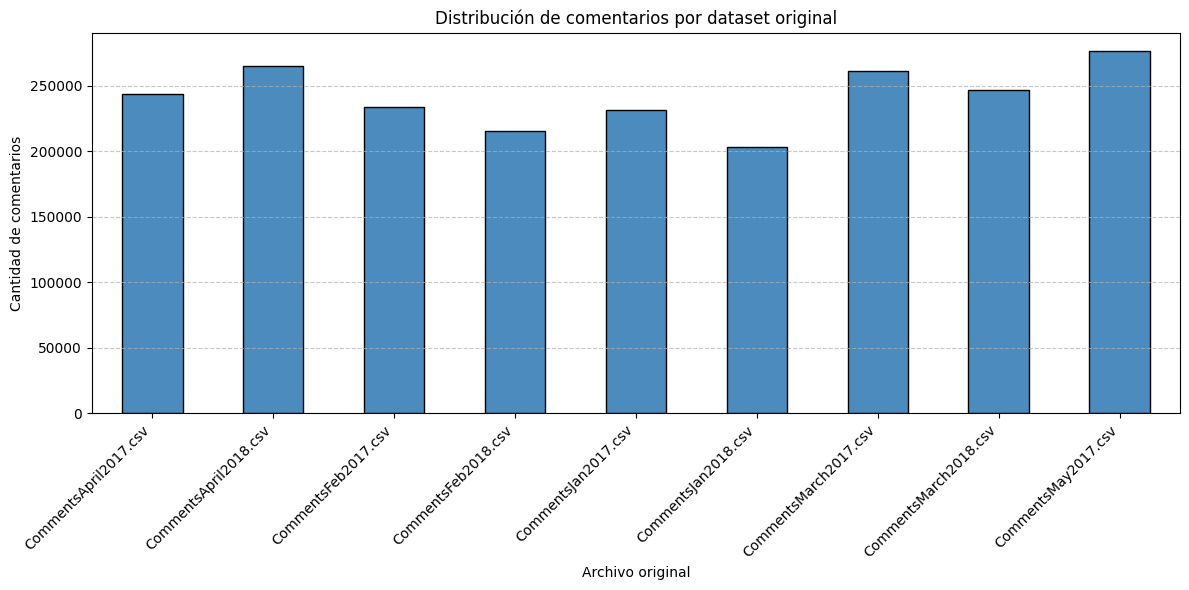

In [10]:
# Contar la cantidad de comentarios por dataset original
distribution = df["originalDataset"].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
distribution.plot(kind="bar", color="#4B8BBE", edgecolor="black")
plt.title("Distribución de comentarios por dataset original")
plt.xlabel("Archivo original")
plt.ylabel("Cantidad de comentarios")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar gráfico
plt.show()

La distribución es bastante homogenea, por lo que no se espera un existan problemas al momento de entrenar una red en base a las fuentes de los comentarios.

## 🔄 NLP: Preprocesamiento de Comentarios

Con el objetivo de preparar los comentarios para análisis de texto, se aplicó un proceso de limpieza y normalización sobre cada comentario (`commentBody`). Los pasos fueron los siguientes:

### ✨ Pasos del preprocesamiento

1. **Tokenización**  
   Se separó cada comentario en palabras (tokens) usando `word_tokenize` de NLTK.

2. **Conversión a minúsculas**  
   Todos los tokens fueron convertidos a minúsculas para reducir variaciones.

3. **Eliminación de puntuación**  
   Se descartaron todos los tokens que contenían símbolos no alfabéticos.

4. **Eliminación de Stopwords**  
   Se eliminaron las palabras comunes del idioma inglés (como *the*, *is*, *in*, etc.) utilizando la lista de `stopwords` de NLTK.

5. **Lematización**  
   Cada palabra fue reducida a su forma base (por ejemplo, *running* → *run*) con `WordNetLemmatizer`.

### 💾 Resultado

- Se creó una nueva columna en el dataset llamada `tokens`, que contiene la lista limpia de palabras por comentario.
- El nuevo dataset fue guardado como:  
  **`comments_with_tokens.csv`**

### 📦 Ejemplo del resultado:

| commentID | commentBody         | tokens                    |
|-----------|---------------------|---------------------------|
| 101       | This is amazing!!!  | ['amazing']              |
| 102       | I love this article | ['love', 'article']      |

In [11]:
# Inicializar herramientas
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
punctuations = set(string.punctuation)

def preprocess_text(text):
    try:
        # Tokenizar
        tokens = word_tokenize(str(text))
        # Convertir a minúsculas y eliminar puntuación
        tokens = [word.lower() for word in tokens if word.isalpha()]
        # Eliminar stopwords
        tokens = [word for word in tokens if word not in stop_words]
        # Lematizar
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return tokens
    except:
        return []

# Aplicar la función a la columna de comentarios
df["tokens"] = df["commentBody"].apply(preprocess_text)

# Guardar el nuevo CSV
df.to_csv("comments_with_tokens.csv", index=False)

print("Archivo guardado como 'comments_with_tokens.csv' con columna 'tokens' incluida.")

Archivo guardado como 'comments_with_tokens.csv' con columna 'tokens' incluida.


## 💬 Análisis de Sentimientos de los Comentarios

En esta sección se realiza un análisis de sentimientos utilizando el analizador **VADER** (Valence Aware Dictionary for Sentiment Reasoning), el cual está diseñado específicamente para analizar el sentimiento en textos cortos como los comentarios de redes sociales o artículos de noticias.

### 📥 Carga del Dataset
Se carga el archivo `comments_with_tokens.csv`, el cual contiene los comentarios procesados y tokenizados.

### 🧠 Inicialización del Analizador
Se utiliza el módulo `SentimentIntensityAnalyzer` de `nltk.sentiment.vader` para obtener una puntuación de sentimiento para cada comentario.

### 🏷️ Clasificación del Sentimiento
Cada comentario es evaluado para obtener un puntaje de "compound" entre -1 y 1:
- Si el puntaje es mayor o igual a **0.05**, el sentimiento es **positivo** 😊.
- Si el puntaje es menor o igual a **-0.05**, el sentimiento es **negativo** 😠.
- Si el puntaje está entre **-0.05** y **0.05**, el sentimiento es **neutral** 😐.

### 🆕 Creación de una Nueva Columna
El resultado del análisis de sentimiento es almacenado en una nueva columna llamada `sentiment`.

### 💾 Guardado del Resultado
Finalmente, se guarda el DataFrame con el nuevo atributo en un archivo llamado `comments_with_sentiment.csv`.

Este análisis permite entender la distribución emocional de los comentarios, lo cual puede ser útil para tareas como monitoreo de opinión pública, estudios de comportamiento de usuarios, o evaluación de artículos.

In [12]:
# Inicializar analizador
sia = SentimentIntensityAnalyzer()

# Cargar el dataset
df = pd.read_csv("comments_with_tokens.csv")

# Analizar sentimiento de cada comentario
def classify_sentiment(text):
    score = sia.polarity_scores(str(text))["compound"]
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

# Crear nueva columna 'sentiment'
df["sentiment"] = df["commentBody"].apply(classify_sentiment)

# Ver distribución
print(df["sentiment"].value_counts())

# Guardar el nuevo dataset
df.to_csv("comments_with_sentiments.csv", index=False)

sentiment
positive    1055690
negative     895960
neutral      224714
Name: count, dtype: int64


## 🧪 Separación del Dataset

Para entrenar el modelo de clasificación de sentimientos, partimos del dataset enriquecido `comment_with_sentiment.csv`, que contiene los comentarios tokenizados y etiquetados con su correspondiente sentimiento (`positive`, `neutral`, `negative`).

El procedimiento seguido fue:

- Se extrajo la columna `commentBody` como entrada textual.
- La columna `sentiment` se usó como etiqueta.
- Se dividió el dataset en un **80% para entrenamiento** y **20% para evaluación**, manteniendo la proporción original de clases mediante `stratify`.

Esto asegura una distribución equilibrada de sentimientos en ambos conjuntos.

In [4]:
# Cargar el dataset
df = pd.read_csv("comments_with_sentiments.csv")

# Verificar que la columna 'sentiment' exista
assert 'sentiment' in df.columns, "'sentiment' column not found in dataset."

# Separar características y etiquetas
X = df['commentBody']     # o df['tokens'] si prefieres usar los tokens
y = df['sentiment']

# Dividir en train y test (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Mostrar tamaños resultantes
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

Tamaño del conjunto de entrenamiento: 1741091
Tamaño del conjunto de prueba: 435273


## 🧾 Preprocesamiento de texto: Tokenización, Secuencias y Padding

Para poder utilizar los comentarios en un modelo de red neuronal, debemos convertir el texto en una forma que la red pueda entender: **números**. Para eso usamos un proceso en tres etapas clave:

### 🔤 Tokenización

La **tokenización** es el proceso de convertir palabras a números. Utilizamos el `Tokenizer` de TensorFlow para:

1. Analizar todos los textos y construir un **vocabulario** de palabras frecuentes.
2. Asignar un **índice entero** a cada palabra. Por ejemplo:
   - `"happy"` → 1
   - `"sad"` → 2
3. Palabras que no están en el vocabulario (por límite de tamaño) se etiquetan como `<OOV>` (fuera de vocabulario).

### 🔢 Secuencias

Una vez entrenado el tokenizer, cada comentario se convierte en una **lista de números**. Por ejemplo:

```text
"I am very happy" → [1, 2, 3, 4]
```
Cada texto se representa como una secuencia de índices numéricos según el vocabulario.

### 🧱 Padding

Las redes neuronales requieren que todas las secuencias tengan el mismo tamaño, pero los comentarios tienen diferentes longitudes. Por eso:

    Usamos padding para rellenar con ceros (0) las secuencias más cortas.

    Usamos truncating para recortar las secuencias más largas.

Ejemplo con longitud máxima (MAX_SEQUENCE_LENGTH = 6):

| Texto                         | Secuencia                | Secuencia con padding |
| ----------------------------- | ------------------------ | --------------------- |
| `"I love it"`                 | `[1, 2, 3]`              | `[1, 2, 3, 0, 0, 0]`  |
| `"Too complicated text here"` | `[4, 5, 6, 7, 8, 9, 10]` | `[4, 5, 6, 7, 8, 9]`  |

Este proceso asegura que la entrada final para la red sea una matriz de forma (n_muestras, longitud_fija), por ejemplo (10000, 200).

In [ ]:
# Asegurarse de que no haya valores nulos en los comentarios
X_train = X_train.fillna("").astype(str)
X_test = X_test.fillna("").astype(str)

MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 200

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

print(f"✅ X_train_pad shape: {X_train_pad.shape}")
print(f"✅ X_test_pad shape: {X_test_pad.shape}")

✅ X_train_pad shape: (1741091, 200)
✅ X_test_pad shape: (435273, 200)


## 🧠 Arquitectura del Modelo de Clasificación de Sentimientos

El modelo de clasificación de sentimientos se construye utilizando **TensorFlow/Keras**, y está diseñado para procesar texto mediante embeddings y capas profundas que capturan relaciones contextuales.

### 🧬 Estructura del modelo

- **Input Layer**: recibe secuencias de texto preprocesado.
- **Embedding Layer**: convierte cada palabra en un vector denso de tamaño fijo. Esto permite representar el significado de las palabras de manera distribuida.
- **GlobalAveragePooling1D**: reduce la dimensionalidad.
- **Dense Layer(s)**: capas completamente conectadas que refinan las representaciones.
- **Output Layer (Softmax)**: devuelve una distribución de probabilidad para las clases `positive`, `neutral`, `negative`.

### ⚙️ Compilación del modelo

- **Loss**: `sparse_categorical_crossentropy` (ya que las etiquetas son enteros y hay más de 2 clases).
- **Optimizer**: `Adam`
- **Metrics**: `accuracy`

Esta arquitectura permite que el modelo aprenda patrones sintácticos y semánticos que caracterizan los distintos tipos de sentimientos expresados en los comentarios.

In [10]:
# Definir parámetros clave
MAX_NUM_WORDS = 10000         # Tamaño del vocabulario
EMBEDDING_DIM = 64            # Dimensión de los vectores de embedding
MAX_SEQUENCE_LENGTH = 200     # Longitud fija de entrada
NUM_CLASSES = 3               # positive, neutral, negative

# Crear el modelo secuencial
model = Sequential([
    # Capa de embedding: convierte índices de palabras en vectores densos
    Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),

    # Capa de pooling: reduce la secuencia a un vector promedio
    GlobalAveragePooling1D(),

    # Capa densa oculta: activa relaciones no lineales
    Dense(64, activation='relu'),

    # Capa de salida: devuelve probabilidades para 3 clases
    Dense(NUM_CLASSES, activation='softmax')
])

# Compilar el modelo con optimizador, función de pérdida y métrica
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Mostrar resumen del modelo
model.summary()

d:\comment_analysis\env\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Crear codificador
label_encoder = LabelEncoder()

# Ajustar con todos los valores posibles
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Entrenamiento de modelo
history = model.fit(
    X_train_pad, y_train_encoded,
    validation_split=0.1,
    epochs=10,
    batch_size=128,
    verbose=1
)

Epoch 1/10
12243/12243 ━━━━━━━━━━━━━━━━━━━━ 316s 26ms/step - accuracy: 0.8501 - loss: 0.4016 - val_accuracy: 0.8549 - val_loss: 0.3995
Epoch 2/10
12243/12243 ━━━━━━━━━━━━━━━━━━━━ 333s 27ms/step - accuracy: 0.8534 - loss: 0.3942 - val_accuracy: 0.8426 - val_loss: 0.4200
Epoch 3/10
12243/12243 ━━━━━━━━━━━━━━━━━━━━ 334s 27ms/step - accuracy: 0.8546 - loss: 0.3903 - val_accuracy: 0.8595 - val_loss: 0.3849
Epoch 4/10
12243/12243 ━━━━━━━━━━━━━━━━━━━━ 390s 28ms/step - accuracy: 0.8564 - loss: 0.3860 - val_accuracy: 0.8472 - val_loss: 0.4069
Epoch 5/10
12243/12243 ━━━━━━━━━━━━━━━━━━━━ 371s 30ms/step - accuracy: 0.8580 - loss: 0.3813 - val_accuracy: 0.8597 - val_loss: 0.3901
Epoch 6/10
12243/12243 ━━━━━━━━━━━━━━━━━━━━ 384s 31ms/step - accuracy: 0.8590 - loss: 0.3786 - val_accuracy: 0.8586 - val_loss: 0.3879
Epoch 7/10
12243/12243 ━━━━━━━━━━━━━━━━━━━━ 405s 33ms/step - accuracy: 0.8613 - loss: 0.3724 - val_accuracy: 0.7955 - val_loss: 0.5231
Epoch 8/10
12243/12243 ━━━━━━━━━━━━━━━━━━━━ 417s 34ms/s

13603/13603 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.8581 - loss: 0.3927
Test accuracy: 0.858


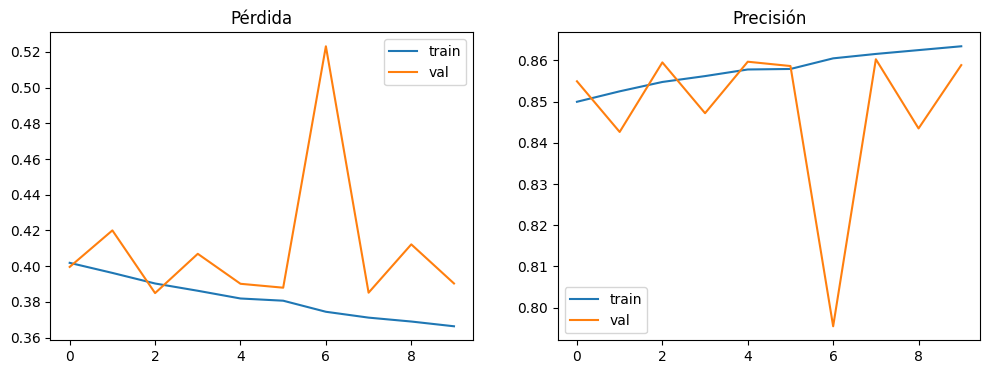

In [20]:
# Evaluación en test
test_loss, test_acc = model.evaluate(X_test_pad, y_test_encoded)
print(f"Test accuracy: {test_acc:.3f}")

# Curvas de entrenamiento
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Pérdida'); plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Precisión'); plt.legend()
plt.show()